In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import os
import matplotlib.pylab as plt
from pandas.plotting import scatter_matrix, parallel_coordinates
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
from sklearn import datasets
from IPython.display import Image  
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from scipy import stats
from sklearn import metrics

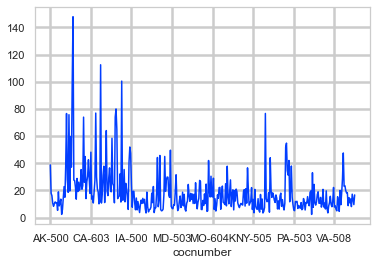

Text(0.5, 1.0, 'Total Outcomes By Year')

<Figure size 720x432 with 0 Axes>

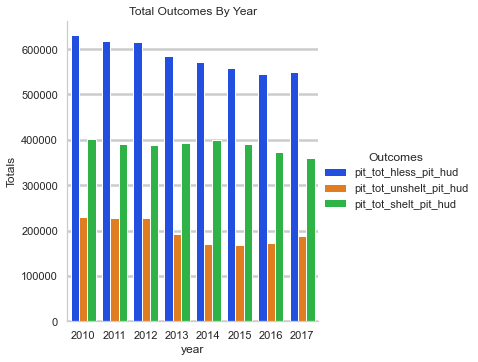

In [3]:
#Read csv and get data

df = pd.read_csv("file:///Users/spatkar/Desktop/05b_analysis_file_update.csv")


#SafetyNet Variables

change_in_econ_sn_eitc_irs_share_values_2013_to_2017 = df.groupby(['cocnumber'])['econ_sn_eitc_irs_share'].mean()

share_of_households_with_public_assistance_income_2016 = df.groupby(['cocnumber'])['econ_sn_cashasst_acs5yr_2017'].mean()

percentage_of_housing_units_2016_built_before_1940 = df.groupby(['cocnumber'])['hou_mkt_homeage1940_acs5yr_2017'].mean()

share_HUD_subsidized_housing_to_total = df.groupby(['cocnumber'])['hou_pol_hudunit_psh_hud_share'].mean()

share_of_under_18_population_living_with_single_parent = df.groupby(['cocnumber'])['dem_soc_singparent_acs5yr'].mean()

share_of_the_civilian_population_25_and_older_with_veteran_status  = df.groupby(['cocnumber'])['dem_soc_vet_acs5yr'].mean()


share_of_households_with_public_assistance_income_2016.to_csv("share_of_households_with_public_assistance_income_2016.csv")

change_in_econ_sn_eitc_irs_share_values_2013_to_2017.to_csv("change_in_econ_sn_eitc_irs_share_values_2013_to_2017.csv")

percentage_of_housing_units_2016_built_before_1940.to_csv("percentage_of_housing_units_2016_built_before_1940.csv")

share_HUD_subsidized_housing_to_total.to_csv("share_HUD_subsidized_housing_to_total.csv")



#Demographics Variables

education_bachelors_or_higher_to_total_population_ages_25_64   = df.groupby(['cocnumber'])['dem_soc_ed_bach_acs5yr'].mean()

total_white_population = df.groupby(['cocnumber'])['dem_soc_white_census'].mean()

total_population = df.groupby(['cocnumber'])['dem_pop_pop_census'].mean()

ratio_white_population_to_total_population = total_white_population/total_population

total_black_population = df.groupby(['cocnumber'])['dem_soc_black_census'].mean()


ratio_black_population_to_total_population = total_black_population/total_population


ratio_black_population_to_total_population = total_black_population/total_population

total_hispanic_population = df.groupby(['cocnumber'])['dem_soc_hispanic_census'].mean()


ratio_hispanic_population_to_total_population = total_hispanic_population/total_population


total_asian_population = df.groupby(['cocnumber'])['dem_soc_asian_census'].mean()

ratio_asian_population_to_total_population = total_asian_population/total_population


total_other_population = df.groupby(['cocnumber'])['dem_soc_racetwo_census'].mean()

ratio_other_population_to_total_population = total_other_population/total_population

share_of_under_18_population_living_with_single_parent.to_csv('share_of_under_18_population_living_with_single_parent.csv')

share_of_the_civilian_population_25_and_older_with_veteran_status.to_csv('share_of_the_civilian_population_25_and_older_with_veteran_status.csv')

education_bachelors_or_higher_to_total_population_ages_25_64.to_csv('education_bachelors_or_higher_to_total_population_ages_25_64.csv')

ratio_white_population_to_total_population.to_csv('ratio_white_population_to_total_population.csv')

combined_demographics2 = pd.DataFrame() 

combined_demographics2['ratio_black_population_to_total_population']= ratio_black_population_to_total_population

combined_demographics2['ratio_asian_population_to_total_population']= ratio_asian_population_to_total_population
combined_demographics2['ratio_other_population_to_total_population ']= ratio_other_population_to_total_population 

combined_demographics2['ratio_hispanic_population_to_total_population'] = ratio_hispanic_population_to_total_population

combined_demographics2.to_csv('combined_demographics2.csv')


#Housing Variables


HousingVariables = df[['year', 'cocnumber', 'hou_mkt_medrent_acs5yr', 'hou_mkt_rentvacancy_acs5yr', 'hou_mkt_utility_acs5yr', 'hou_mkt_burden_sev_rent_acs5yr']]
HousingGrouped = HousingVariables.groupby(['cocnumber'])[['hou_mkt_medrent_acs5yr', 'hou_mkt_rentvacancy_acs5yr', 'hou_mkt_utility_acs5yr', 'hou_mkt_burden_sev_rent_acs5yr']].agg('mean').fillna(HousingVariables.mean()).reset_index() 

HousingGrouped.to_csv("combined_Housing.csv")


#Economics Variables

ecoVariables = df[['year', 'cocnumber', 'econ_labor_incineq_acs5yr', 'econ_labor_unemp_pop_BLS', 'econ_labor_medinc_acs5yr', 'econ_labor_pov_pop_census_share']]
ecoGrouped = ecoVariables.groupby(['cocnumber'])[['econ_labor_incineq_acs5yr', 'econ_labor_unemp_pop_BLS', 'econ_labor_medinc_acs5yr', 'econ_labor_pov_pop_census_share']].agg('mean').fillna(ecoVariables.mean()).reset_index()

ecoGrouped.to_csv("combined_EcoGroup.csv")



#Climate Variables


climateVariables = df[['year', 'cocnumber', 'env_wea_avgtemp_noaa', 'env_wea_avgtemp_summer_noaa', 'env_wea_precip_noaa', 'env_wea_precip_annual_noaa']]
climateGrouped = climateVariables.groupby(['cocnumber'])[['env_wea_avgtemp_noaa', 'env_wea_avgtemp_summer_noaa', 'env_wea_precip_noaa', 'env_wea_precip_annual_noaa']].agg('mean').fillna(ecoVariables.mean()).reset_index()

climateGrouped.to_csv("combined_climateGroup.csv")



#Graphing based on homelessness per 10000 by Cocnumber

homelessness_per_10000_by_cocnumber = df.groupby('cocnumber')['pit_hless_pit_hud_share'].mean()
homelessness_per_10000_by_cocnumber.plot()
plt.show()




#Used Seaborn to Plot Sheltered, Unsheltered, Homeless by Year

totalsGrouped = df.groupby('year')[['pit_tot_hless_pit_hud','pit_tot_unshelt_pit_hud','pit_tot_shelt_pit_hud']].agg('sum').reset_index()

melted = totalsGrouped.melt('year', var_name='Outcomes', value_name='Totals')


plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1, rc={'grid.linewidth':2.5})
sns.set_palette('bright')

sns.catplot(x = 'year', y = 'Totals', hue = 'Outcomes', kind='bar', data=melted, ci=None)
plt.title('Total Outcomes By Year')



In [4]:
df = pd.read_csv("master.csv")

In [5]:
df.dtypes

cocnumber                                         object
dem_soc_singparent_acs5yr                        float64
dem_soc_vet_acs5yr                               float64
dem_soc_ed_bach_acs5yr                           float64
ratio_white_population_to_total_population       float64
ratio_black_population_to_total_population       float64
ratio_asian_population_to_total_population       float64
ratio_other_population_to_total_population       float64
ratio_hispanic_population_to_total_population    float64
env_wea_avgtemp_summer_noaa                      float64
env_wea_precip_annual_noaa                       float64
env_wea_precip_noaa                              float64
d_env_wea_avgtemp_noaa                           float64
giniHouseholds                                   float64
totalUnemployed                                  float64
medianIncome                                     float64
povertyRate                                      float64
median_rent                    

In [6]:
df.describe().tail()

dem_soc_singparent_acs5yr  dem_soc_vet_acs5yr  dem_soc_ed_bach_acs5yr  \
min                   0.096079            0.032608                0.117692   
25%                   0.210329            0.090631                0.226404   
50%                   0.246870            0.109780                0.288577   
75%                   0.290432            0.122924                0.355116   
max                   0.550490            0.230738                0.750255   

     ratio_white_population_to_total_population  \
min                                    0.126738   
25%                                    0.587634   
50%                                    0.723530   
75%                                    0.837937   
max                                    0.968976   

     ratio_black_population_to_total_population  \
min                                    0.003744   
25%                                    0.027143   
50%                                    0.079177   
75%                                    0.162250   
max                                    0.630369   

     ratio_asian_population_to_total_population  \
min                                    0.003418   
25%                                    0.012134   
50%                                    0.023733   
75%                                    0.042987   
max                                    0.422376   

     ratio_other_population_to_total_population   \
min                                     0.005692   
25%                                     0.014224   
50%                                     0.017079   
75%                                     0.021851   
max                                     0.209100   

     ratio_hispanic_population_to_total_population  \
min                                       0.009301   
25%                                       0.041648   
50%                                       0.076203   
75%                                       0.154286   
max                                       0.817905   

     env_wea_avgtemp_summer_noaa  env_wea_precip_annual_noaa  ...  \
min                    57.925000                    2.945000  ...   
25%                    69.654376                   35.085360  ...   
50%                    73.973805                   43.878369  ...   
75%                    78.330638                   48.399139  ...   
max                    91.768750                   91.346251  ...   

     povertyRate  median_rent  rental_vacancy_rate  utility_costs  \
min     3.733638   367.851654             0.028239      57.500000   
25%    11.760760   573.833496             0.054367     127.286500   
50%    14.438774   698.750000             0.066919     147.995255   
75%    17.280375   859.125000             0.082841     167.500000   
max    32.368015  1649.742126             0.208483     217.229134   

     percentage_of_renters_with_severe_cost_burden  \
min                                       0.166834   
25%                                       0.233646   
50%                                       0.254187   
75%                                       0.279300   
max                                       0.366615   

     econ_sn_cashasst_acs5yr_2017  econ_sn_eitc_irs_share  \
min                      0.839265                6.614255   
25%                      1.858513               14.653862   
50%                      2.510458               17.794506   
75%                      3.245625               21.809130   
max                      9.266645               41.691945   

     hou_mkt_homeage1940_acs5yr_2017  hou_pol_hudunit_psh_hud_share  \
min                         0.256009                       0.132758   
25%                         4.605375                       2.312614   
50%                         9.906635                       3.295004   
75%                        19.267433                       4.691643   
max                        56.005539                      13.009511   

        totHLess  
min     1

In [7]:
#check for missing values
df.isnull().sum()

cocnumber                                        0
dem_soc_singparent_acs5yr                        0
dem_soc_vet_acs5yr                               0
dem_soc_ed_bach_acs5yr                           0
ratio_white_population_to_total_population       0
ratio_black_population_to_total_population       0
ratio_asian_population_to_total_population       0
ratio_other_population_to_total_population       0
ratio_hispanic_population_to_total_population    0
env_wea_avgtemp_summer_noaa                      0
env_wea_precip_annual_noaa                       0
env_wea_precip_noaa                              0
d_env_wea_avgtemp_noaa                           0
giniHouseholds                                   0
totalUnemployed                                  0
medianIncome                                     0
povertyRate                                      0
median_rent                                      0
rental_vacancy_rate                              0
utility_costs                  

In [8]:
# check for duplicate values
df.duplicated().sum()

0

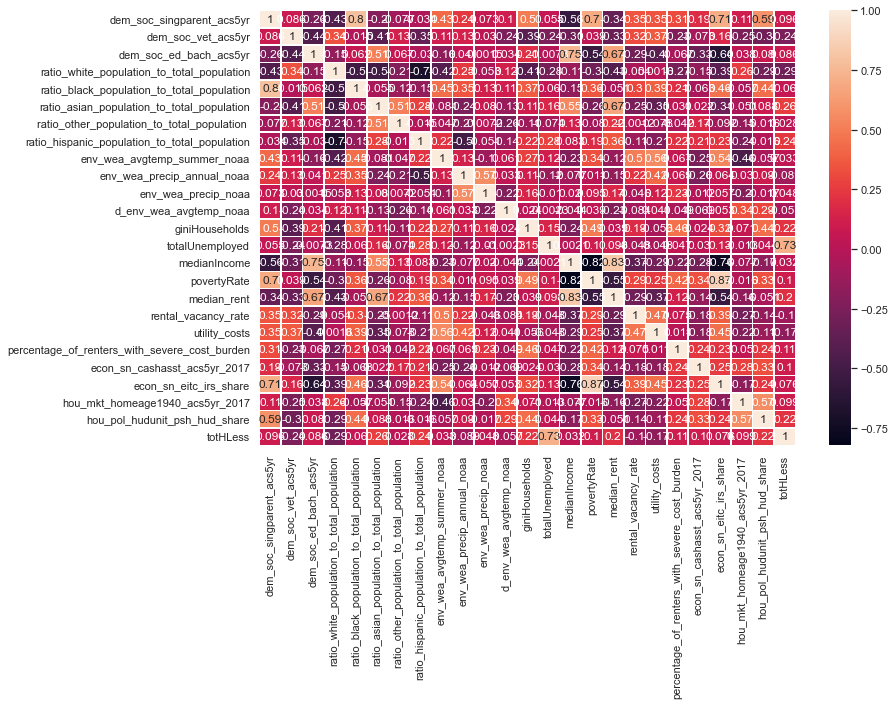

In [9]:
#correlation matrix...predictors should not be too highly correlated to avoid multicollinearity

dfcorr = df.drop(columns = ['cocnumber'])
corrMatrix = dfcorr.corr()
plt.figure(figsize=(12,8))
ax = sns.heatmap(corrMatrix, annot=True, linewidths=.5)

In [10]:

dfcorr.corr()

dem_soc_singparent_acs5yr  \
dem_soc_singparent_acs5yr                                       1.000000   
dem_soc_vet_acs5yr                                              0.086481   
dem_soc_ed_bach_acs5yr                                         -0.255240   
ratio_white_population_to_total_population                     -0.431560   
ratio_black_population_to_total_population                      0.800498   
ratio_asian_population_to_total_population                     -0.202134   
ratio_other_population_to_total_population                     -0.076572   
ratio_hispanic_population_to_total_population                  -0.034179   
env_wea_avgtemp_summer_noaa                                     0.429347   
env_wea_precip_annual_noaa                                      0.240130   
env_wea_precip_noaa                                             0.073111   
d_env_wea_avgtemp_noaa                                          0.104076   
giniHouseholds                                                  0.501318   
totalUnemployed                                                 0.055335   
medianIncome                                                   -0.562442   
povertyRate                                                     0.700237   
median_rent                                                    -0.338693   
rental_vacancy_rate                                             0.346489   
utility_costs                                                   0.347453   
percentage_of_renters_with_severe_cost_burden                   0.314666   
econ_sn_cashasst_acs5yr_2017                                    0.194523   
econ_sn_eitc_irs_share                                          0.708663   
hou_mkt_homeage1940_acs5yr_2017                                 0.113484   
hou_pol_hudunit_psh_hud_share                                   0.591688   
totHLess                                                        0.095995   

                                               dem_soc_vet_acs5yr  \
dem_soc_singparent_acs5yr                                0.086481   
dem_soc_vet_acs5yr                                       1.000000   
dem_soc_ed_bach_acs5yr                                  -0.444732   
ratio_white_population_to_total_population               0.335972   
ratio_black_population_to_total_population              -0.014731   
ratio_asian_population_to_total_population              -0.406157   
ratio_other_population_to_total_population               0.125421   
ratio_hispanic_population_to_total_population           -0.345274   
env_wea_avgtemp_summer_noaa                              0.109575   
env_wea_precip_annual_noaa                               0.134073   
env_wea_precip_noaa                                      0.030058   
d_env_wea_avgtemp_noaa                                  -0.241146   
giniHouseholds                                          -0.392486   
totalUnemployed                                         -0.242202   
medianIncome                                            -0.311671   
povertyRate                                              0.038711   
median_rent                                             -0.330763   
rental_vacancy_rate                                      0.315998   
utility_costs                                            0.368181   
percentage_of_renters_with_severe_cost_burden           -0.229247   
econ_sn_cashasst_acs5yr_2017                            -0.072741   
econ_sn_eitc_irs_share                                   0.162216   
hou_mkt_homeage1940_acs5yr_2017                         -0.248565   
hou_pol_hudunit_psh_hud_share                           -0.299199   
totHLess                                                -0.241929   

                                               dem_soc_ed_bach_acs5yr  \
dem_soc_singparent_acs5yr                                   -0.255240   
dem_soc_vet_acs5yr                                          -0.444732   
dem_soc_ed_bach_acs5yr                                  

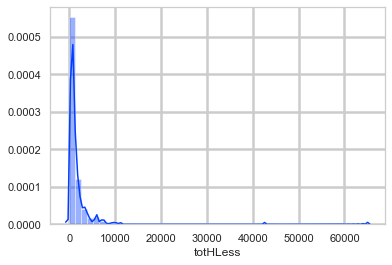

In [11]:
#check the distribution of the dependent variable
sns.distplot(df['totHLess'])

In [12]:
#apply a transformation to alleviate highly skewed dependent variable
df['totHLesslog'] = np.log(df['totHLess'])

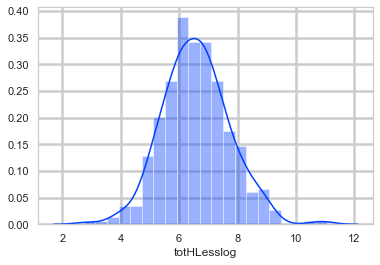

In [13]:
sns.distplot(df['totHLesslog'])

In [14]:
#check that new log transformed variable was created
df.head()


cocnumber  dem_soc_singparent_acs5yr  dem_soc_vet_acs5yr  \
0    AK-500                   0.225763            0.158847   
1    AK-501                   0.200518            0.149775   
2    AL-500                   0.321756            0.103016   
3    AL-501                   0.338382            0.128488   
4    AL-502                   0.280308            0.100979   

   dem_soc_ed_bach_acs5yr  ratio_white_population_to_total_population  \
0                0.337069                                    0.611694   
1                0.239836                                    0.641599   
2                0.331717                                    0.605378   
3                0.243895                                    0.663803   
4                0.173857                                    0.837754   

   ratio_black_population_to_total_population  \
0                                    0.054470   
1                                    0.018912   
2                                    0.326915   
3                                    0.267921   
4                                    0.092185   

   ratio_asian_population_to_total_population  \
0                                    0.085369   
1                                    0.036709   
2                                    0.015225   
3                                    0.015708   
4                                    0.004443   

   ratio_other_population_to_total_population   \
0                                     0.066414   
1                                     0.058061   
2                                     0.010349   
3                                     0.013183   
4                                     0.016060   

   ratio_hispanic_population_to_total_population  env_wea_avgtemp_summer_noaa  \
0                                       0.083717                    57.925000   
1                                       0.049899                    57.925000   
2                                       0.039402                    79.540657   
3                                       0.031230                    81.496088   
4                                       0.038655                    77.972349   

   ...  median_rent  rental_vacancy_rate  utility_costs  \
0  ...  1055.500000             0.044627      89.000000   
1  ...   889.357910             0.066532     142.283066   
2  ...   612.156921             0.087481     203.545532   
3  ...   609.652741             0.176016     188.788635   
4  ...   367.851654             0.069421     186.288773   

   percentage_of_renters_with_severe_cost_burden  \
0                                       0.199569   
1                                       0.192538   
2                                       0.257798   
3                                       0.273494   
4                                       0.234236   

   econ_sn_cashasst_acs5yr_2017  econ_sn_eitc_irs_share  \
0                      5.534967               12.869623   
1                      7.072760               14.251441   
2                      1.674812               22.607839   
3                      1.724120               27.055973   
4                      1.429967               24.777507   

   hou_mkt_homeage1940_acs5yr_2017  hou_pol_hudunit_psh_hud_share  totHLess  \
0                         0.366995                       3.528235  1148.375   
1                         2.236410                       1.925379   773.500   
2                         7.191579                       4.726577  1525.125   
3                         3.681716                       5.171222   641.625   
4                         5.150007                       4.551439   221.875   

   totHLesslog  
0     7.046103  
1     6.650926  
2     7.329832  
3     6.464004  
4     5.402114  

[5 rows x 27 columns]

In [15]:
#create training and validation set 

x = df.drop(columns=['totHLess','totHLesslog', 'cocnumber'])
y = df['totHLess']

trainx, validx, trainy, validy = train_test_split(x, y, test_size=0.4, random_state=1)

print(trainx.shape, trainy.shape)
print(validx.shape, validy.shape)


(225, 24) (225,)
(151, 24) (151,)


In [16]:
#multiple linear regression on non-transformed dependent variable

home_lm = LinearRegression()
home_lm.fit(trainx, trainy)

coeff_df = pd.DataFrame(home_lm.coef_,x.columns,columns=['Coefficient'])
coeff_df


Coefficient
dem_soc_singparent_acs5yr                      -7849.279082
dem_soc_vet_acs5yr                             -3112.267325
dem_soc_ed_bach_acs5yr                          7338.616124
ratio_white_population_to_total_population    -19749.264868
ratio_black_population_to_total_population    -25482.916751
ratio_asian_population_to_total_population    -18555.992637
ratio_other_population_to_total_population    -47187.359534
ratio_hispanic_population_to_total_population -29550.422980
env_wea_avgtemp_summer_noaa                      130.938385
env_wea_precip_annual_noaa                       -22.623371
env_wea_precip_noaa                              265.324005
d_env_wea_avgtemp_noaa                          -103.644833
giniHouseholds                                -21011.814587
totalUnemployed                                    0.072538
medianIncome                                    -137.824864
povertyRate                                      -95.474220
median_rent                                        9.531684
rental_vacancy_rate                              218.285827
utility_costs                                     -6.436337
percentage_of_renters_with_severe_cost_burden   3487.056444
econ_sn_cashasst_acs5yr_2017                      19.607508
econ_sn_eitc_irs_share                           192.650760
hou_mkt_homeage1940_acs5yr_2017                   46.634917
hou_pol_hudunit_psh_hud_share                    643.945409

In [17]:
predictions = home_lm.predict(validx)

Text(0, 0.5, 'Predictions')

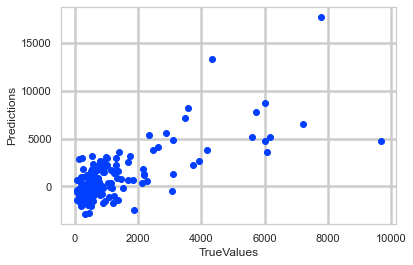

In [18]:

#plot actual vs. predicted

plt.scatter(validy, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')

In [19]:

#calulcate R2 for model

val_set_r2 = r2_score(validy, predictions)

print(val_set_r2)

-0.3953557139208925


In [20]:

x = df.drop(columns=['totHLess','totHLesslog', 'cocnumber'])
y = df['totHLesslog']

trainx, validx, trainy, validy = train_test_split(x, y, test_size=0.4, random_state=1)

print(trainx.shape, trainy.shape)
print(validx.shape, validy.shape)


(225, 24) (225,)
(151, 24) (151,)


In [21]:
home_lm = LinearRegression()
home_lm.fit(trainx, trainy)

coeff_df = pd.DataFrame(home_lm.coef_,x.columns,columns=['Coefficient'])
coeff_df.sort_values(['Coefficient'])


Coefficient
rental_vacancy_rate                              -3.696497
percentage_of_renters_with_severe_cost_burden    -3.608984
dem_soc_ed_bach_acs5yr                           -2.132992
hou_pol_hudunit_psh_hud_share                    -0.036206
povertyRate                                      -0.034359
env_wea_precip_noaa                              -0.033302
d_env_wea_avgtemp_noaa                           -0.028108
econ_sn_eitc_irs_share                           -0.025959
hou_mkt_homeage1940_acs5yr_2017                  -0.011121
medianIncome                                     -0.005222
utility_costs                                    -0.003836
totalUnemployed                                   0.000012
median_rent                                       0.001298
env_wea_precip_annual_noaa                        0.001424
env_wea_avgtemp_summer_noaa                       0.003545
econ_sn_cashasst_acs5yr_2017                      0.048769
dem_soc_vet_acs5yr                                0.515573
ratio_black_population_to_total_population        2.720410
ratio_white_population_to_total_population        2.814444
ratio_hispanic_population_to_total_population     3.518237
ratio_asian_population_to_total_population        3.899289
dem_soc_singparent_acs5yr                         7.257832
giniHouseholds                                   10.235979
ratio_other_population_to_total_population       11.913936

In [22]:

predictions = home_lm.predict(validx)

Text(0, 0.5, 'Predictions')

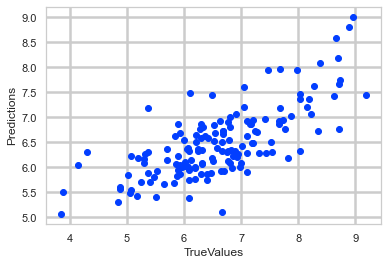

In [23]:
plt.scatter(validy, predictions)
plt.xlabel('TrueValues')
plt.ylabel('Predictions')

In [24]:


val_set_r2 = r2_score(validy, predictions)
print(val_set_r2)


0.5175937532207842


In [25]:
#get absolute values for coefficients

coeff_df.Coefficient = coeff_df.Coefficient.abs()
coeff_df.sort_values(['Coefficient'])

Coefficient
totalUnemployed                                   0.000012
median_rent                                       0.001298
env_wea_precip_annual_noaa                        0.001424
env_wea_avgtemp_summer_noaa                       0.003545
utility_costs                                     0.003836
medianIncome                                      0.005222
hou_mkt_homeage1940_acs5yr_2017                   0.011121
econ_sn_eitc_irs_share                            0.025959
d_env_wea_avgtemp_noaa                            0.028108
env_wea_precip_noaa                               0.033302
povertyRate                                       0.034359
hou_pol_hudunit_psh_hud_share                     0.036206
econ_sn_cashasst_acs5yr_2017                      0.048769
dem_soc_vet_acs5yr                                0.515573
dem_soc_ed_bach_acs5yr                            2.132992
ratio_black_population_to_total_population        2.720410
ratio_white_population_to_total_population        2.814444
ratio_hispanic_population_to_total_population     3.518237
percentage_of_renters_with_severe_cost_burden     3.608984
rental_vacancy_rate                               3.696497
ratio_asian_population_to_total_population        3.899289
dem_soc_singparent_acs5yr                         7.257832
giniHouseholds                                   10.235979
ratio_other_population_to_total_population       11.913936